# 서울시 코로나19 확진자 현황

* 분석 목적
> 확진 일자와 지역 간 연관관계를 찾고자 함\
> 본래는 1년치 데이터를 하나의 그래프로 정리하려고 했으나 역량 부족으로 1개월씩만 표시함


* 진행 현황
> csv import \
> matplotlib 시각화

In [1]:
import os, csv, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(np.__version__, '/', pd.__version__)
print('Libraries imported')

1.23.4 / 1.5.1
Libraries imported


In [2]:
df=pd.read_csv('서울시 코로나19 확진자 현황.csv', index_col="연번", encoding='utf-8')
df

,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
연번,,,,,,,,,,,,,
5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1.31.,9,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
4,1.30.,7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
3,1.30.,6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y


In [3]:
#결측치 제거: 국적, 환자정보, 상태, 이동경로
#일단은 groupby를 통해 새 변수로 지정

# df_filter=df.groupby("연번")[["확진일","환자번호","지역", "여행력", "접촉력"]]

df1=df.drop(columns=['국적','환자정보','접촉력','조치사항','이동경로','등록일','수정일','노출여부'])
df1.sample(10)

,확진일,환자번호,지역,여행력,상태
연번,,,,,
1854,8.15.,15176,강서구,NaN,퇴원
2600,8.20.,16668,은평구,NaN,퇴원
2974,8.23.,17744,서초구,NaN,퇴원
1477,7.19.,13769,강서구,NaN,퇴원
4574,9.10.,21874,노원구,우즈베키스탄,퇴원
790,5.26.,11236,성동구,NaN,퇴원
4277,9.05.,21109,노원구,NaN,퇴원
5405,10.05.,24208,구로구,영국,퇴원
5740,10.21.,25457,관악구,NaN,NaN


In [4]:
#결측치 숫자 확인
#df1.isnull()
print('결측치')
df1.isnull().sum()

결측치


확진일        0
환자번호       0
지역         0
여행력     5289
상태       391
dtype: int64

In [5]:
#Cleaning 함수
#여행력: 빈칸 시 "없음"
#상태: 빈칸 시 "모름"
#접촉력: 삭제

# df2=df1.dropna(subset=['여행력'])
df1.fillna({"여행력": "없음","상태": "입원"}, inplace=True)
df1

,확진일,환자번호,지역,여행력,상태
연번,,,,,
5748,10.21.,25530,양천구,없음,입원
5747,10.21.,25528,강동구,없음,입원
5746,10.21.,25525,강남구,없음,입원
5745,10.21.,25517,관악구,없음,입원
5744,10.21.,25504,관악구,없음,입원
...,...,...,...,...,...
5,1.31.,9,성북구,없음,퇴원
4,1.30.,7,마포구,중국 우한시,퇴원
3,1.30.,6,종로구,없음,퇴원


In [6]:
#지역과 상태

print(df1.지역.value_counts())
# df2=df1.reset_index()
# df2.columns = ['장소', '확진자수']
# df2
print('-'*30)
print(df1.상태.value_counts())

관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     201
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      116
금천구      96
종로구      94
중구       64
종랑구       1
한국        1
Name: 지역, dtype: int64
------------------------------
퇴원    5283
입원     391
사망      74
Name: 상태, dtype: int64


In [7]:
#월별로 확진자 수 분리

df1['확진월'] = df1.apply(lambda row: row['확진일'].split('.')[0], axis=1)
df1['확진월']

연번
5748    10
5747    10
5746    10
5745    10
5744    10
        ..
5        1
4        1
3        1
2        1
1        1
Name: 확진월, Length: 5748, dtype: object

### 본래 분석 목표

#1. 월별로 서울시 내 어떠한 지역에서 확진자가 많이 발생했는지 분석 \
#2. 발생 추이가 지역에 국한되어 있는지, 아니면 다른 구/시도에서 넘어왔는지 분석하고자 함 \
#3. 무슨 사건이 일어났는지 데이터셋에서 불러옴
--> 시도하지 못함

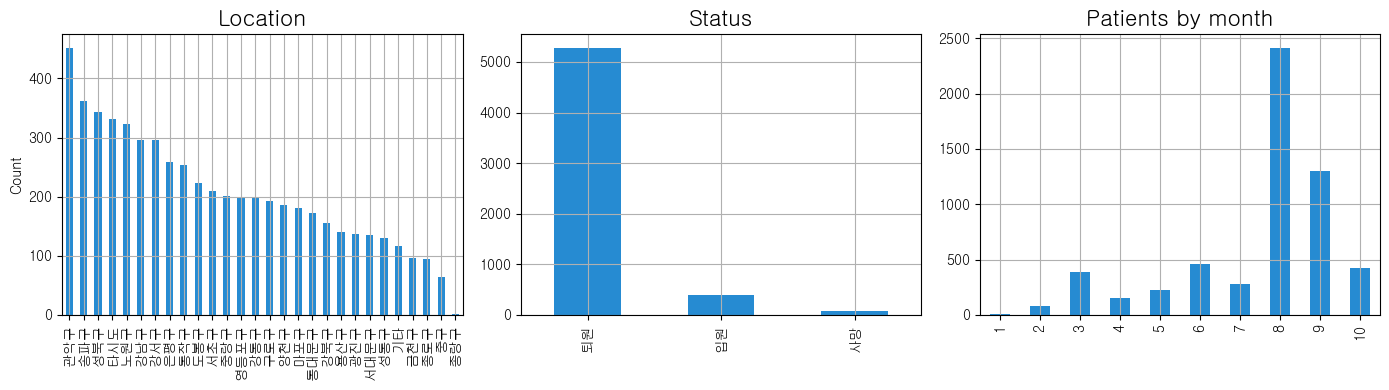

In [8]:
#시각화
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
# print(plt.style.available)
plt.style.use('Solarize_Light2')

#확진자 지역별 분류(서울시 각 도)
df1.지역.value_counts().head(28).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('Location')

#확진자 상태별 부류(입원/퇴원/사망)
df1.상태.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Status')

#확진자 월별 분류
month_df = df1.확진월.value_counts()
month_index = map(int, df1.확진월.value_counts().index.tolist() )
# print(list(month_index))
month_df.index=month_index
month_df=month_df.sort_index()
month_df.plot(kind='bar', ax=ax[2], title="Patients by month")

f.subplots_adjust(wspace=0.5)
f.tight_layout()
plt.show()

In [9]:
monthly_data={}

df_month=df1.loc[df1['확진월']=='1']
type(df_month)  #pandas DF
df_month=df_month.지역.value_counts()
# new_index=['구','확진자']
# df_month.reindex(new_index)
# type(df_month)  #pandas Series
df_month

# monthly_data['Test1']=df_month
# monthly_data

종로구    3
성북구    1
마포구    1
중랑구    1
강서구    1
Name: 지역, dtype: int64

In [18]:
annual_data={}

new_index=['구','확진자']
for i in range(10):     #10월까지의 데이터밖에 없음
    df_month=df1.loc[df1['확진월']==str(i+1)]
    df_month=df_month.지역.value_counts()
    df_month.reindex(new_index)
    annual_data[str(i+1)+'월']=df_month

#특정 월 입력
month='7'
monthly_data=annual_data[month+'월']
annual_data[month+'월']

송파구     44
관악구     27
강서구     25
동작구     17
강남구     15
마포구     14
강동구     14
중랑구     11
은평구     11
타시도      9
성북구      9
중구       8
성동구      8
영등포구     7
서초구      7
금천구      7
노원구      6
서대문구     6
동대문구     6
종로구      6
광진구      5
구로구      5
용산구      4
기타       4
강북구      4
도봉구      2
Name: 지역, dtype: int64

Text(0.5, 1.0, '2020년 7월 구별 코로나 확진자 수 현황')

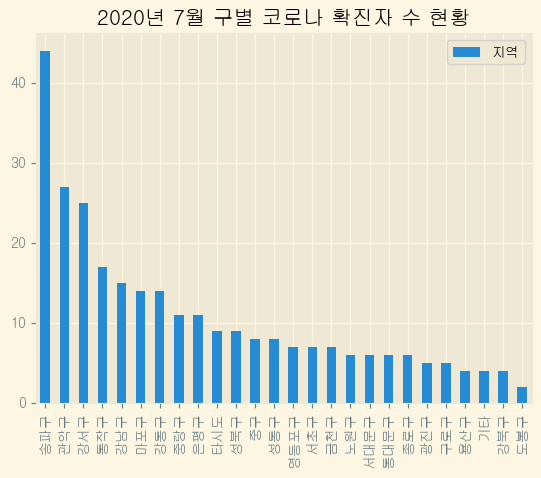

In [14]:
df_month_graph=pd.DataFrame(monthly_data)
df_month_graph.plot.bar()
plt.title(f'2020년 {month}월 구별 코로나 확진자 수 현황', fontsize=15)

# 끝------------------------------------------

In [19]:
#사용되지 않는 코드

#한눈에 모든 데이터를 표시하려 했으나 구 이름 중복값 제거를 못함
#중복값 제거함과 동시에 숫자를 합쳐야 하나 시간 내에 방법을 찾지 못함

df_month=df1.loc[df1['확진월']=='1']
df_month=df_month.지역.value_counts()
df_month=pd.DataFrame(df_month)
print(type(df_month))
df_month_all=df_month.rename(columns={'지역':'1월'})

df_month_all

<class 'pandas.core.frame.DataFrame'>


,1월
종로구,3
성북구,1
마포구,1
중랑구,1
강서구,1


In [20]:
#사용하지 않는 코드

df_month_all=pd.DataFrame()

for i in range(10):
    df_month=df1.loc[df1['확진월']==str(i+1)]
    df_month=df_month.지역.value_counts()
    df_month=pd.DataFrame(df_month)
    # print(type(df_month))
    df_month=df_month.rename(columns={'지역': str(i+1)+'월'})
    df_month_all=pd.concat([df_month_all, df_month], axis=0)

df_month_all.fillna(0, inplace=True)
df_month_all = df_month_all.astype(int)
df_month_all

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월
종로구,3,0,0,0,0,0,0,0,0,0
성북구,1,0,0,0,0,0,0,0,0,0
마포구,1,0,0,0,0,0,0,0,0,0
중랑구,1,0,0,0,0,0,0,0,0,0
강서구,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
광진구,0,0,0,0,0,0,0,0,0,6
중구,0,0,0,0,0,0,0,0,0,5
양천구,0,0,0,0,0,0,0,0,0,5
금천구,0,0,0,0,0,0,0,0,0,3


- Drop rows from dataframe \
https://sparkbyexamples.com/pandas/pandas-drop-rows-from-dataframe/ \
https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
- Randomly select rows from dataframe (Dataframe.sample) \
https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/ \
https://rfriend.tistory.com/602
- Different ways to create pandas dataframe \
https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
- Delete missing values 결측치 제거 \
https://workingwithpython.com/howtohandlemissingvaluewithpython/
- Filter row by conditions \
https://sparkbyexamples.com/pandas/pandas-filter-rows-by-conditions/
- Covid-19 Dataset (Other) \
https://sparkbyexamples.com/pandas/pandas-filter-rows-by-conditions/
